<a href="https://colab.research.google.com/github/ikuyumcu/Ramazan-ay-sat-analizi/blob/main/Colab'e_ho%C5%9F_geldiniz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1. VERİ TANIMLAMA
# Verileri her yıl ve her birim (Koli/TL) için bir liste içinde sözlük yapısıyla tanımlıyoruz.
data_list = [
    # 2022 Verileri
    {"Yil": 2022, "Birim": "Koli", "Oncesi": 59567, "Ramazan": 58099, "Bayram_4_Gun": 9606, "Sonrasi": 69511},
    {"Yil": 2022, "Birim": "TL", "Oncesi": 3076000, "Ramazan": 2889869, "Bayram_4_Gun": 510896, "Sonrasi": 3967635},

    # 2023 Verileri
    {"Yil": 2023, "Birim": "Koli", "Oncesi": 71878, "Ramazan": 68330, "Bayram_4_Gun": 12732, "Sonrasi": 75925},
    {"Yil": 2023, "Birim": "TL", "Oncesi": 6646308, "Ramazan": 6311180, "Bayram_4_Gun": 1333758, "Sonrasi": 7774820},

    # 2024 Verileri
    {"Yil": 2024, "Birim": "Koli", "Oncesi": 71431, "Ramazan": 68587, "Bayram_4_Gun": 11635, "Sonrasi": 76133},
    {"Yil": 2024, "Birim": "TL", "Oncesi": 11313128, "Ramazan": 11707930, "Bayram_4_Gun": 2240835, "Sonrasi": 13138578},

    # 2025 Verileri
    {"Yil": 2025, "Birim": "Koli", "Oncesi": 78335, "Ramazan": 83080, "Bayram_4_Gun": 14809, "Sonrasi": 89135},
    {"Yil": 2025, "Birim": "TL", "Oncesi": 14974612, "Ramazan": 15022155, "Bayram_4_Gun": 2807197, "Sonrasi": 17537000}
]

# Listeyi Pandas DataFrame yapısına çeviriyoruz (Tablo görünümü sağlar)
df = pd.DataFrame(data_list)

# 2. HESAPLAMA MANTIĞI
# Ramazan ayının önceki aya göre yüzde kaç düştüğünü veya çıktığını hesaplar
df['Ramazan_Oncesi_Degisim_%'] = ((df['Ramazan'] - df['Oncesi']) / df['Oncesi']) * 100

# Ramazan ayının sonraki aya göre yüzde kaç farklı olduğunu hesaplar
df['Ramazan_Sonrasi_Degisim_%'] = ((df['Ramazan'] - df['Sonrasi']) / df['Sonrasi']) * 100

# Bayram öncesi 4 günün toplam Ramazan ayı içindeki yüzde payı
df['Bayram_Payi_%'] = (df['Bayram_4_Gun'] / df['Ramazan']) * 100

# Bayram hızı artışı: Bayramdaki GÜNLÜK satışın, Ramazan'daki GÜNLÜK ortalamaya göre artış oranı
# Formül: ((Bayram / 4 gün) / (Ramazan / 30 gün) - 1) * 100
df['Bayram_Hiz_Artisi_%'] = (((df['Bayram_4_Gun'] / 4) / (df['Ramazan'] / 30)) - 1) * 100

# 3. SONUÇLARI EKRANA YAZDIRMA
print("--- DETAYLI SATIŞ ANALİZ RAPORU ---")

# Her yılı döngü ile tek tek yazdırıyoruz
for yil in df['Yil'].unique():
    print(f"\n>>>> {yil} YILI VERİLERİ <<<<")

    # O yıla ait satırları filtrele
    yil_ozel = df[df['Yil'] == yil]

    for index, satir in yil_ozel.iterrows():
        print(f"[{satir['Birim']} Bazında Analiz]")
        print(f"  - Ramazan vs Önceki Ay: %{satir['Ramazan_Oncesi_Degisim_%']:.2f}")
        print(f"  - Ramazan vs Sonraki Ay: %{satir['Ramazan_Sonrasi_Degisim_%']:.2f}")
        print(f"  - Bayram 4 Günün Toplam Ramazan'daki Payı: %{satir['Bayram_Payi_%']:.2f}")
        print(f"  - Bayram Dönemi Günlük Satış Hızı Artışı: %{satir['Bayram_Hiz_Artisi_%']:.2f}")
        print("-" * 40)

# 4. EXCEL/CSV OLARAK KAYDETME (Opsiyonel)
# df.to_csv("satis_analiz_sonuclari.csv", index=False, encoding='utf-8-sig')
# print("\nSonuçlar 'satis_analiz_sonuclari.csv' dosyasına kaydedildi.")

--- DETAYLI SATIŞ ANALİZ RAPORU ---

>>>> 2022 YILI VERİLERİ <<<<
[Koli Bazında Analiz]
  - Ramazan vs Önceki Ay: %-2.46
  - Ramazan vs Sonraki Ay: %-16.42
  - Bayram 4 Günün Toplam Ramazan'daki Payı: %16.53
  - Bayram Dönemi Günlük Satış Hızı Artışı: %24.00
----------------------------------------
[TL Bazında Analiz]
  - Ramazan vs Önceki Ay: %-6.05
  - Ramazan vs Sonraki Ay: %-27.16
  - Bayram 4 Günün Toplam Ramazan'daki Payı: %17.68
  - Bayram Dönemi Günlük Satış Hızı Artışı: %32.59
----------------------------------------

>>>> 2023 YILI VERİLERİ <<<<
[Koli Bazında Analiz]
  - Ramazan vs Önceki Ay: %-4.94
  - Ramazan vs Sonraki Ay: %-10.00
  - Bayram 4 Günün Toplam Ramazan'daki Payı: %18.63
  - Bayram Dönemi Günlük Satış Hızı Artışı: %39.75
----------------------------------------
[TL Bazında Analiz]
  - Ramazan vs Önceki Ay: %-5.04
  - Ramazan vs Sonraki Ay: %-18.83
  - Bayram 4 Günün Toplam Ramazan'daki Payı: %21.13
  - Bayram Dönemi Günlük Satış Hızı Artışı: %58.50
-------------

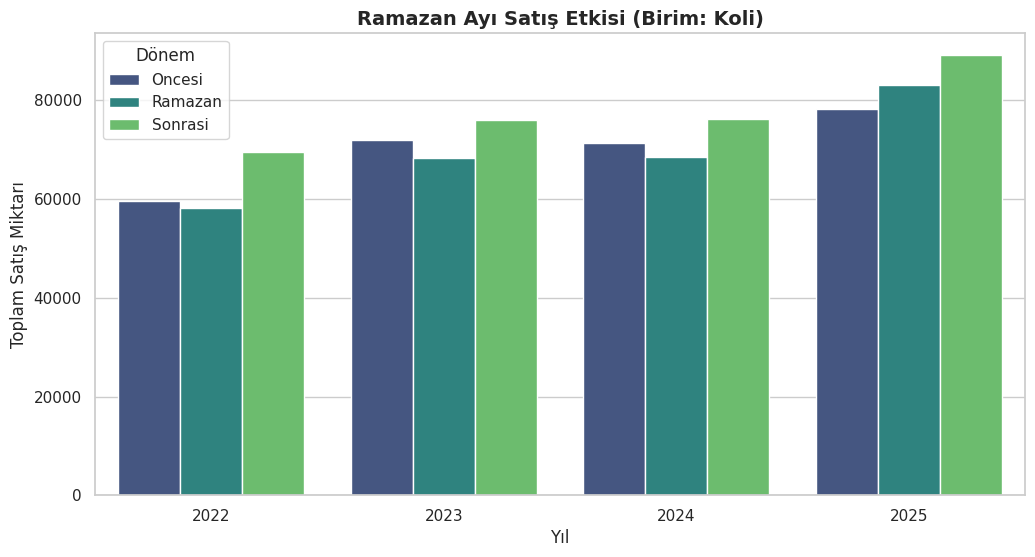

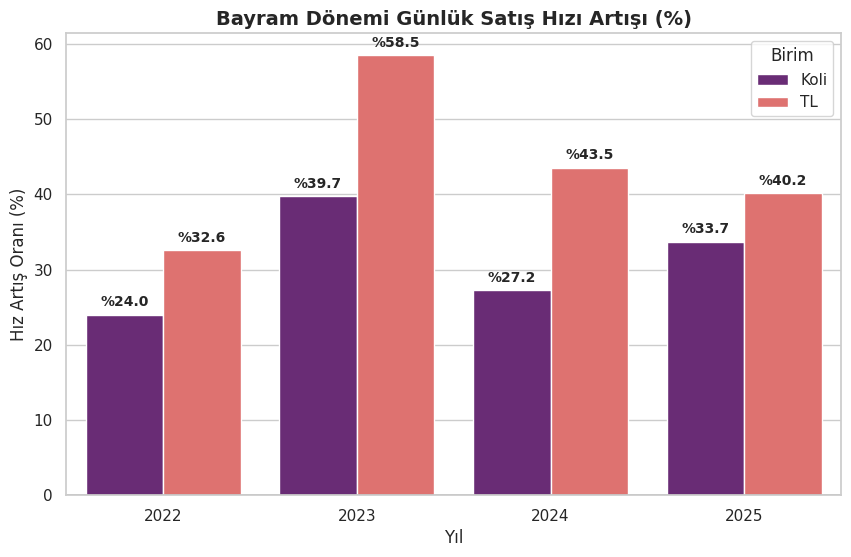

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. VERİ TANIMLAMA
data_list = [
    {"Yil": 2022, "Birim": "Koli", "Oncesi": 59567, "Ramazan": 58099, "Bayram_4_Gun": 9606, "Sonrasi": 69511},
    {"Yil": 2022, "Birim": "TL", "Oncesi": 3076000, "Ramazan": 2889869, "Bayram_4_Gun": 510896, "Sonrasi": 3967635},
    {"Yil": 2023, "Birim": "Koli", "Oncesi": 71878, "Ramazan": 68330, "Bayram_4_Gun": 12732, "Sonrasi": 75925},
    {"Yil": 2023, "Birim": "TL", "Oncesi": 6646308, "Ramazan": 6311180, "Bayram_4_Gun": 1333758, "Sonrasi": 7774820},
    {"Yil": 2024, "Birim": "Koli", "Oncesi": 71431, "Ramazan": 68587, "Bayram_4_Gun": 11635, "Sonrasi": 76133},
    {"Yil": 2024, "Birim": "TL", "Oncesi": 11313128, "Ramazan": 11707930, "Bayram_4_Gun": 2240835, "Sonrasi": 13138578},
    {"Yil": 2025, "Birim": "Koli", "Oncesi": 78335, "Ramazan": 83080, "Bayram_4_Gun": 14809, "Sonrasi": 89135},
    {"Yil": 2025, "Birim": "TL", "Oncesi": 14974612, "Ramazan": 15022155, "Bayram_4_Gun": 2807197, "Sonrasi": 17537000}
]
df = pd.DataFrame(data_list)

# Bayram Hız Artışı Hesaplaması
df['Bayram_Hiz_Artisi_%'] = (((df['Bayram_4_Gun'] / 4) / (df['Ramazan'] / 30)) - 1) * 100


sns.set_theme(style="whitegrid")

# GRAFİK 1: RAMAZAN AYI ETKİSİ (KOLİ BAZLI)
plt.figure(figsize=(12, 6))
df_koli = df[df['Birim'] == 'Koli'].melt(id_vars=['Yil'], value_vars=['Oncesi', 'Ramazan', 'Sonrasi'],
                                        var_name='Donem', value_name='Satis')
sns.barplot(data=df_koli, x='Yil', y='Satis', hue='Donem', palette='viridis')
plt.title('Ramazan Ayı Satış Etkisi (Birim: Koli)', fontsize=14, fontweight='bold')
plt.ylabel('Toplam Satış Miktarı')
plt.xlabel('Yıl')
plt.legend(title='Dönem')
plt.savefig('ramazan_etkisi_koli.png')

# GRAFİK 2: BAYRAM DÖNEMİ GÜNLÜK SATIŞ HIZI ARTIŞI
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Yil', y='Bayram_Hiz_Artisi_%', hue='Birim', palette='magma')
plt.axhline(0, color='black', linewidth=1)
plt.title('Bayram Dönemi Günlük Satış Hızı Artışı (%)', fontsize=14, fontweight='bold')
plt.ylabel('Hız Artış Oranı (%)')
plt.xlabel('Yıl')

# Barların üzerine yüzde değerlerini yazdırma
for p in plt.gca().patches:
    if p.get_height() != 0:
        plt.gca().annotate(f'%{p.get_height():.1f}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 9),
                           textcoords='offset points', fontsize=10, fontweight='bold')

plt.savefig('bayram_hiz_artisi.png')
plt.show()

In [ ]:
import pandas as pd

# 1. Tarihsel Veriler (2022-2024) - Model bunlarla eğitiliyor
history_data = [
    {"Yil": 2022, "Birim": "Koli", "Oncesi": 59567, "Ramazan": 58099, "Bayram_4_Gun": 9606, "Sonrasi": 69511},
    {"Yil": 2022, "Birim": "TL", "Oncesi": 3076000, "Ramazan": 2889869, "Bayram_4_Gun": 510896, "Sonrasi": 3967635},
    {"Yil": 2023, "Birim": "Koli", "Oncesi": 71878, "Ramazan": 68330, "Bayram_4_Gun": 12732, "Sonrasi": 75925},
    {"Yil": 2023, "Birim": "TL", "Oncesi": 6646308, "Ramazan": 6311180, "Bayram_4_Gun": 1333758, "Sonrasi": 7774820},
    {"Yil": 2024, "Birim": "Koli", "Oncesi": 71431, "Ramazan": 68587, "Bayram_4_Gun": 11635, "Sonrasi": 76133},
    {"Yil": 2024, "Birim": "TL", "Oncesi": 11313128, "Ramazan": 11707930, "Bayram_4_Gun": 2240835, "Sonrasi": 13138578},
]

# 2. 2025 Başlangıç Noktası (Tahmin için kullanılan tek gerçek veri)
base_2025 = {"Koli": 78335, "TL": 14974612}

df_hist = pd.DataFrame(history_data)

# Geçmiş oranları hesapla
df_hist['Ratio_Ramazan_Oncesi'] = df_hist['Ramazan'] / df_hist['Oncesi']
df_hist['Ratio_Sonrasi_Ramazan'] = df_hist['Sonrasi'] / df_hist['Ramazan']
df_hist['Ratio_Bayram_Ramazan'] = df_hist['Bayram_4_Gun'] / df_hist['Ramazan']

# Birim bazlı tarihsel ortalamaları al
averages = df_hist.groupby('Birim').mean()

print("--- 2022-2024 VERİLERİNE GÖRE 2025 TAHMİN ANALİZİ ---")

for birim in ["Koli", "TL"]:
    avg = averages.loc[birim]
    oncesi = base_2025[birim]

    # Oranları uygula (Tahminleri üret)
    pred_ramazan = oncesi * avg['Ratio_Ramazan_Oncesi']
    pred_sonrasi = pred_ramazan * avg['Ratio_Sonrasi_Ramazan']
    pred_bayram = pred_ramazan * avg['Ratio_Bayram_Ramazan']

    # Bayram hızı artışı (Günlük hız kıyaslaması)
    bayram_hizi = (((avg['Ratio_Bayram_Ramazan'] / 4) / (1 / 30)) - 1) * 100

    print(f"\n[{birim} TAHMİNLERİ]")
    print(f"  * Tahmini Ramazan Satışı   : {int(pred_ramazan):,}")
    print(f"  * Tahmini Bayram (4 Gün)   : {int(pred_bayram):,}")
    print(f"  * Tahmini Ramazan Sonrası  : {int(pred_sonrasi):,}")
    print(f"  * Ramazan'da Beklenen Değişim: %{(avg['Ratio_Ramazan_Oncesi']-1)*100:.2f}")
    print(f"  * Bayram Öncesi Hız Artışı : %{bayram_hizi:.2f}")

--- 2022-2024 VERİLERİNE GÖRE 2025 TAHMİN ANALİZİ ---

[Koli TAHMİNLERİ]
  * Tahmini Ramazan Satışı   : 75,362
  * Tahmini Bayram (4 Gün)   : 13,095
  * Tahmini Ramazan Sonrası  : 85,853
  * Ramazan'da Beklenen Değişim: %-3.79
  * Bayram Öncesi Hız Artışı : %30.33

[TL TAHMİNLERİ]
  * Tahmini Ramazan Satışı   : 14,595,074
  * Tahmini Bayram (4 Gün)   : 2,819,359
  * Tahmini Ramazan Sonrası  : 18,132,206
  * Ramazan'da Beklenen Değişim: %-2.53
  * Bayram Öncesi Hız Artışı : %44.88


In [ ]:
import pandas as pd

# 1. TÜM VERİ SETİ (2022-2025)
data_list = [
    # 2022
    {"Yil": 2022, "Birim": "Koli", "Oncesi": 59567, "Ramazan": 58099, "Bayram_4_Gun": 9606, "Sonrasi": 69511},
    {"Yil": 2022, "Birim": "TL", "Oncesi": 3076000, "Ramazan": 2889869, "Bayram_4_Gun": 510896, "Sonrasi": 3967635},
    # 2023
    {"Yil": 2023, "Birim": "Koli", "Oncesi": 71878, "Ramazan": 68330, "Bayram_4_Gun": 12732, "Sonrasi": 75925},
    {"Yil": 2023, "Birim": "TL", "Oncesi": 6646308, "Ramazan": 6311180, "Bayram_4_Gun": 1333758, "Sonrasi": 7774820},
    # 2024
    {"Yil": 2024, "Birim": "Koli", "Oncesi": 71431, "Ramazan": 68587, "Bayram_4_Gun": 11635, "Sonrasi": 76133},
    {"Yil": 2024, "Birim": "TL", "Oncesi": 11313128, "Ramazan": 11707930, "Bayram_4_Gun": 2240835, "Sonrasi": 13138578},
    # 2025 (Gerçekleşen)
    {"Yil": 2025, "Birim": "Koli", "Oncesi": 78335, "Ramazan": 83080, "Bayram_4_Gun": 14809, "Sonrasi": 89135},
    {"Yil": 2025, "Birim": "TL", "Oncesi": 14974612, "Ramazan": 15022155, "Bayram_4_Gun": 2807197, "Sonrasi": 17537000}
]

df = pd.DataFrame(data_list)

# 2. TARİHSEL ORTALAMALARI HESAPLA (2022-2024)
train_df = df[df['Yil'] < 2025].copy()
train_df['R_Oncesi_Oran'] = train_df['Ramazan'] / train_df['Oncesi']
train_df['Bayram_Oran'] = train_df['Bayram_4_Gun'] / train_df['Ramazan']

avg_r_oncesi = train_df.groupby('Birim')['R_Oncesi_Oran'].mean()
avg_bayram = train_df.groupby('Birim')['Bayram_Oran'].mean()

# 3. 2025 TAHMİN VS GERÇEK ANALİZİ
print("--- 2025 TAHMİN VS GERÇEK KARŞILAŞTIRMASI ---")

for birim in ["Koli", "TL"]:
    gercek_2025 = df[(df['Yil'] == 2025) & (df['Birim'] == birim)].iloc[0]

    # Tahmin: 2025 'Oncesi' verisine geçmiş ortalama oranı uygula
    tahmin_ramazan = gercek_2025['Oncesi'] * avg_r_oncesi[birim]
    tahmin_bayram = tahmin_ramazan * avg_bayram[birim]

    # Hata Payları
    hata_ramazan = ((gercek_2025['Ramazan'] - tahmin_ramazan) / tahmin_ramazan) * 100

    print(f"\n[{birim} Analizi]")
    print(f"  * Tahmin Edilen Ramazan : {int(tahmin_ramazan):,}")
    print(f"  * Gerçekleşen Ramazan   : {int(gercek_2025['Ramazan']):,}")
    print(f"  * Tahmin Sapması        : %{hata_ramazan:.2f}")

    # 4. BAYRAM HIZI ANALİZİ (GÜNLÜK)
    hiz_artisi = (((gercek_2025['Bayram_4_Gun']/4) / (gercek_2025['Ramazan']/30)) - 1) * 100
    print(f"  * Bayram Dönemi Günlük Satış Hızı Artışı (Gerçek): %{hiz_artisi:.2f}")

# 4. TÜM ANALİZİ DOSYAYA KAYDET
df.to_csv("final_satis_analizi_2022_2025.csv", index=False, encoding='utf-8-sig')

--- 2025 TAHMİN VS GERÇEK KARŞILAŞTIRMASI ---

[Koli Analizi]
  * Tahmin Edilen Ramazan : 75,362
  * Gerçekleşen Ramazan   : 83,080
  * Tahmin Sapması        : %10.24
  * Bayram Dönemi Günlük Satış Hızı Artışı (Gerçek): %33.69

[TL Analizi]
  * Tahmin Edilen Ramazan : 14,595,074
  * Gerçekleşen Ramazan   : 15,022,155
  * Tahmin Sapması        : %2.93
  * Bayram Dönemi Günlük Satış Hızı Artışı (Gerçek): %40.15
